## Course 1 - Introduction to stochastic processes

We are going to see some data transformation through an example.

Let us load data on Total share prices for all shares for the US (Not Seasonnally Adjusted) (Source: FRED
Federal Reserve of St-Louis)

The series is accessible here
https://fred.stlouisfed.org/series/SPASTT01USM661N
with a different reference
time June 2005.

### Import DATA

In [6]:
import pandas as pd


data = pd.read_excel("C:/Users/Sébastien/Desktop/Économétrie/Cours1/stock_price.xls")
data.head()


,year,month,day,sp
0,1957,1,1,0.037439
1,1957,2,1,0.035951
2,1957,3,1,0.036364
3,1957,4,1,0.037356
4,1957,5,1,0.038596


In [78]:

import datetime
#Créer notre vecteur de date
t_list = []
for x in range(len(data)):
    t_list.append(datetime.date(data.year[x], data.month[x], data.day[x]))
    
#Ajouter ce vecteur à un datframe pandas    
t = pd.DataFrame(t_list, columns=["Date"])
sp = data.sp

#Ajouter notre vecteur de price index à l'intérieur du DF
t['p_index'] = data.sp





### Date Visualization

<AxesSubplot:title={'center':'raw series'}, xlabel='year', ylabel='price index'>

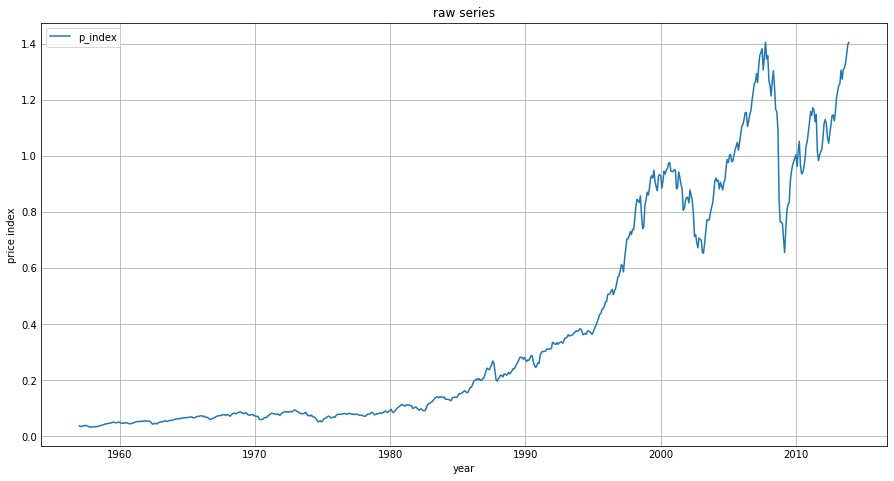

In [79]:
import matplotlib.pyplot as plt

#assign data
t.plot.line(x="Date", y ="p_index",title = "raw series",xlabel="year", ylabel = "price index", figsize = (12, 6))






### Data Transformation

684

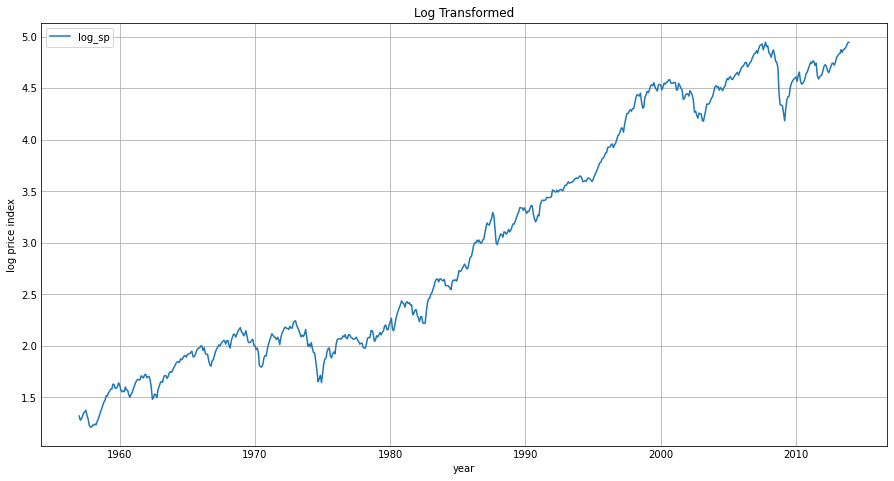

In [134]:
import numpy as np

l_sp_data = np.log(t['p_index']*100) # sp * 100 is the price index



l_sp = pd.DataFrame({"date":t["Date"], "log_sp": l_sp_data})
l_sp.plot.line(x="date", y ="log_sp",title = "Log Transformed",xlabel="year", ylabel = "log price index", figsize = (12, 6))
len(l_sp_data)

### It's much more "linear" now. Is it stationary? How about the first-difference series?

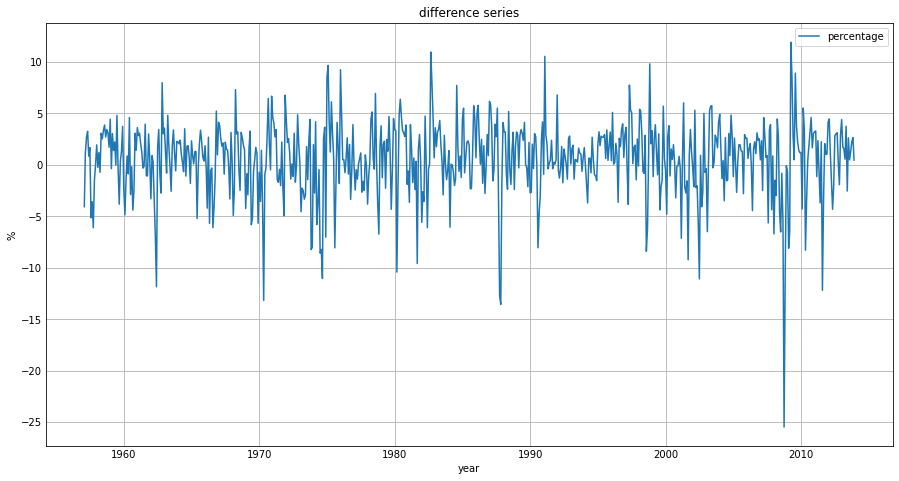

In [244]:
d_sp = np.diff(l_sp["log_sp"]*100) #diff gives first-difference, hence growth rate, x100 gives percentage
diff_serie = pd.DataFrame({"date":t["Date"][1:], "percentage": d_sp})
diff_serie.plot.line(x="date", y ="percentage",title = "difference series", xlabel="year", ylabel = "%", figsize = (12, 6))

The trend has disappeared, but is it stationary?
Let us look at the cyclical component of the de-trended log-linearized series.

In [237]:
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
from matplotlib import pyplot

# We do a linear regression
X = array([[1 for x in range(len(l_sp_data))], [x+1 for x in range(len(l_sp_data))]])
y = l_sp_data
X = X.T
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)


[1.06935121 0.00574417]


### Look at the data

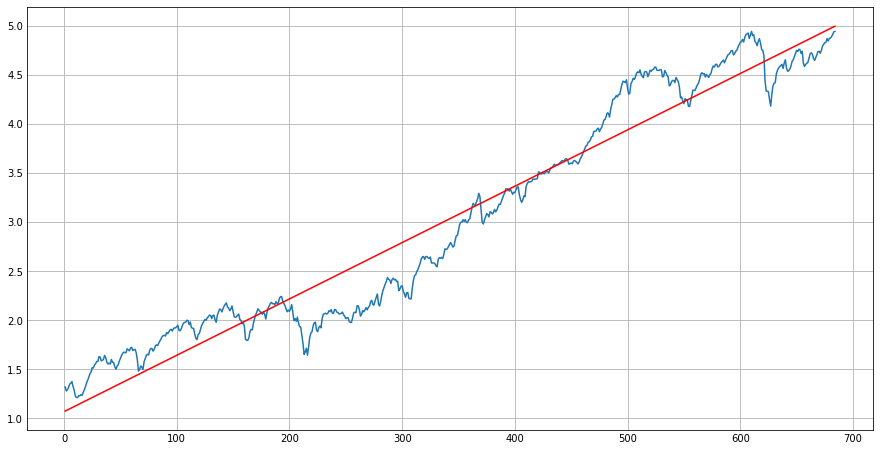

In [232]:
yhat = X.dot(b)
plt.figure(figsize = (12,6))
plt.plot(X[:,1], y)
plt.plot(X[:,1], yhat, color='red')


<AxesSubplot:title={'center':'determinist trend deviation'}, xlabel='year', ylabel='%'>

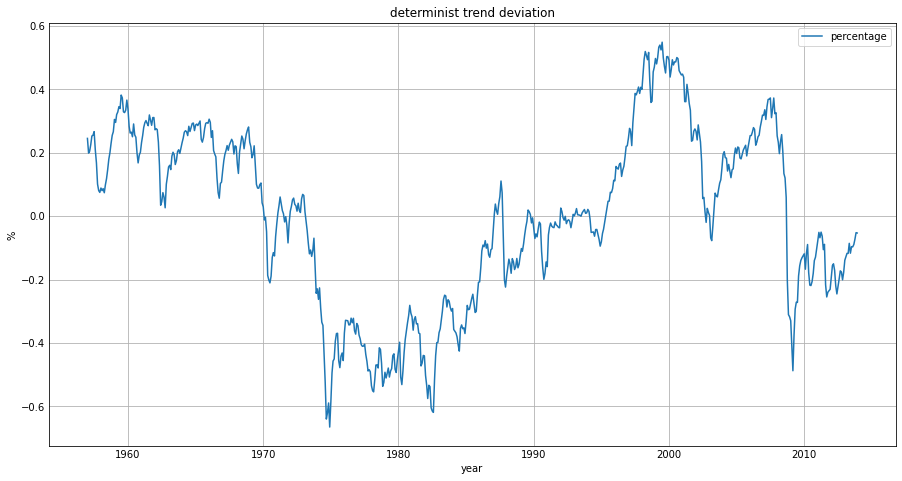

In [257]:
# Detrend series
c_sp = y - yhat
df = pd.DataFrame({"date": t["Date"], "percentage" : c_sp})
df.plot.line(x = "date", y = "percentage", figsize = (12,6), title = "determinist trend deviation", xlabel= 'year', ylabel = "%")

<AxesSubplot:title={'center':'difference series'}, xlabel='year', ylabel='%'>

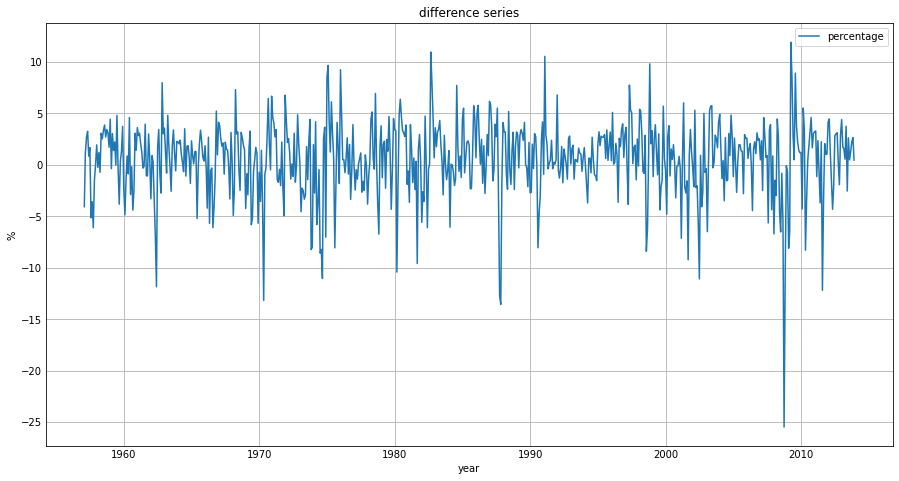

In [253]:
#We already found this graph

diff_serie.plot.line(x="date", y ="percentage",title = "difference series", xlabel="year", ylabel = "%", figsize = (12, 6))

 Notes: 1) d_sp corresponds to the growth rate of the stock price index, or stock return
% 2) c_sp is the percentage deviation of the stock price index relative to the linear deterministic trend
% 3) X\Y computes the OLS: hat beta = (X'X)^{-1} (X'Y)

### Autocorrelations


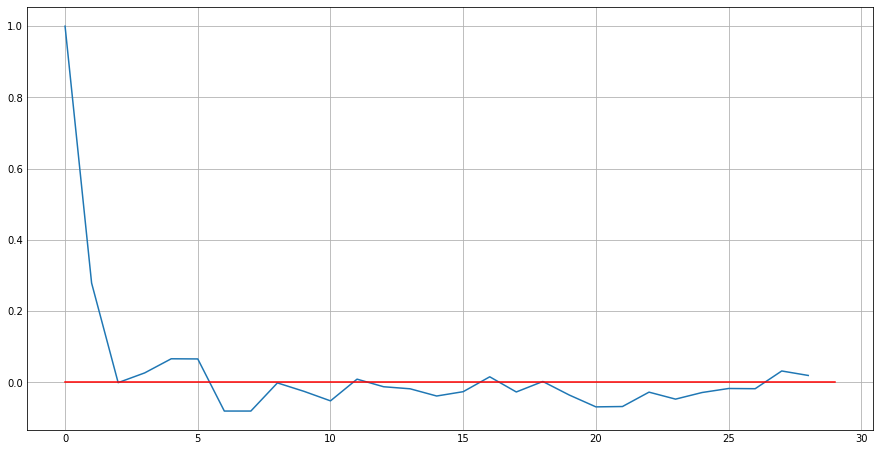

In [281]:
#Autocorrelations 
import statsmodels.api as sm
#Difference series
graph = sm.tsa.acf(d_sp)
plt.figure(figsize = (12,6))
plt.plot(graph)
plt.plot([0 for x in range(30)], color = "red")


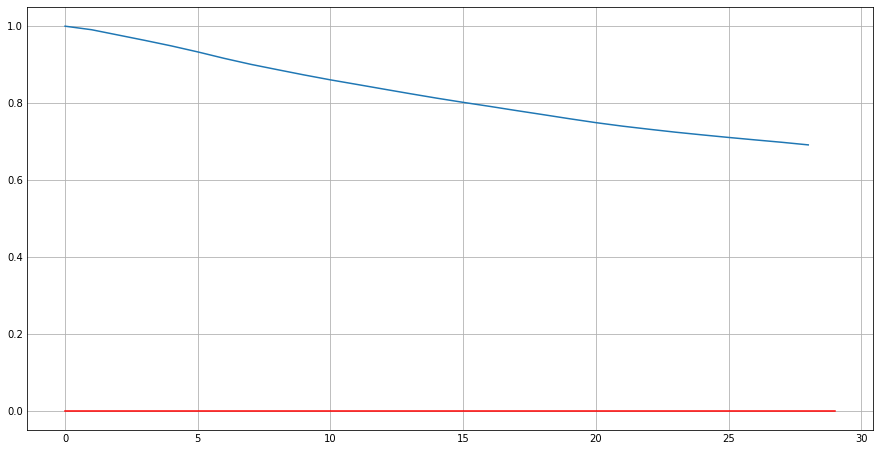

In [282]:
# determinist trend deviation

graph = sm.tsa.acf(c_sp)
plt.figure(figsize = (12,6))
plt.plot(graph)
plt.plot([0 for x in range(30)], color = "red")



###  LJUNG-BOX TEST (ECONOMETRICS TOOLBOX)


It uses the following hypotheses:

H0: The residuals are independently distributed.

HA: The residuals are not independently distributed; they exhibit serial correlation.

In [285]:
#Difference series

sm.stats.acorr_ljungbox(d_sp, lags=[x for x in range(18)], return_df=True)

,lb_stat,lb_pvalue
0,73.673752,NaN
1,53.278917,2.893959e-13
2,53.279448,2.694728e-12
3,53.761341,1.261572e-11
4,56.772109,1.381130e-11
5,59.747369,1.370690e-11
6,64.243976,6.154552e-12
7,68.749776,2.642370e-12
8,68.751648,8.705568e-12
9,69.195229,2.189351e-11


In [286]:
# determinist trend deviation

sm.stats.acorr_ljungbox(c_sp, lags=[x for x in range(18)], return_df=True)

,lb_stat,lb_pvalue
0,9178.373870,NaN
1,674.418785,1.093088e-148
2,1331.166943,8.725115e-290
3,1970.408154,0.000000e+00
4,2591.603027,0.000000e+00
5,3193.341585,0.000000e+00
6,3774.452969,0.000000e+00
7,4336.905151,0.000000e+00
8,4883.047651,0.000000e+00
9,5413.324743,0.000000e+00


% h = 1 indicates rejection of the no residual autocorrelation null hypothesis in favor of the alternative.
% h = 0 indicates failure to reject the no residual autocorrelation null hypothesis.
% Notes: 1) The Ljung-Box statistics indicate that d_sp and c_sp are not white noise.
% 2) The autocorrelations suggest that d_sp is stationary (short
% memory), but that c_sp is not stationary (long memory)
% For this reason, we use d_sp